**Importing Dependencies:**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Loading Dataset:**

In [ ]:
df = pd.read_csv('spam.csv', encoding = 'Latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

**Text Preprocessing:**

In [ ]:
stemmer = PorterStemmer()

In [ ]:
corpus = []

for i in range(0, len(df)):
  text = re.sub('[^a-zA-Z0-9]'," ", df['v2'][i])
  text = text.lower()
  text = text.split()
  text = [stemmer.stem(word) for word in text if word not in stopwords.words('english')]
  text = " ".join(text)
  corpus.append(text)

In [ ]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

**Bag of Words (Converting words into vectors):**

In [ ]:
cv = CountVectorizer(max_features = 2500, binary = True, ngram_range = (2, 2))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(5572, 2500)

**Label Encoding:**

In [ ]:
y = pd.get_dummies(df['v1'])
y.head(3)

,ham,spam
0,1,0
1,1,0
2,0,1


In [ ]:
y = y.iloc[:, 1]

**Train Test Split:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(f"The shape of training dataset are \nX_train: {X_train.shape} \ny_train: {y_train.shape}")

The shape of training dataset are 
X_train: (4179, 2500) 
y_train: (4179,)


In [ ]:
print(f"The shape of test dataset are \nX_test: {X_test.shape} \ny_test: {y_test.shape}")

The shape of test dataset are 
X_test: (1393, 2500) 
y_test: (1393,)


**Choosing the best model:**

In [ ]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'MultinomialNB' : MultinomialNB(),
    'SVC' : SVC(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'AdaBoostClassifier' : AdaBoostClassifier(),
    'XGBClassifier' : XGBClassifier()

}

In [ ]:
model_name = []
score = []

for i in range(len(models)):
  model = list(models.values())[i]
  model.fit(X_train, y_train)
  s = model.score(X_test, y_test)
  model_name.append(list(models.keys())[i])
  score.append(s)
  print(f"{list(models.keys())[i]} completed...")

LogisticRegression completed...
MultinomialNB completed...
SVC completed...
KNeighborsClassifier completed...
DecisionTreeClassifier completed...
RandomForestClassifier completed...
AdaBoostClassifier completed...
XGBClassifier completed...


In [ ]:
pd.DataFrame(list(zip(model_name, score)), columns = ['Model', 'Score']).sort_values(by = 'Score', ascending = False)

,Model,Score
1,MultinomialNB,0.964106
5,RandomForestClassifier,0.957645
4,DecisionTreeClassifier,0.954056
2,SVC,0.949031
0,LogisticRegression,0.944006
6,AdaBoostClassifier,0.943288
7,XGBClassifier,0.927495
3,KNeighborsClassifier,0.912419


**Model Training:**

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1196
           1       0.99      0.75      0.86       197

    accuracy                           0.96      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.96      0.96      1393



<Axes: >

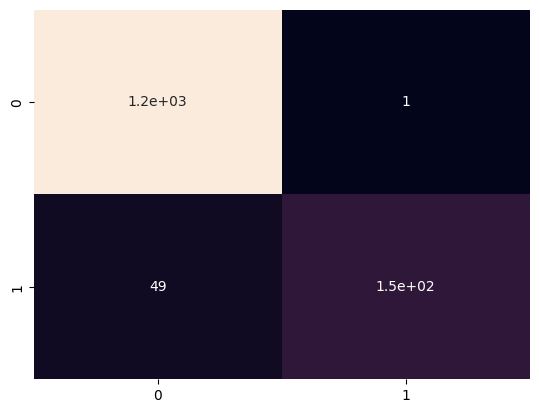

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot = True, cbar = False)

**Hyperparameter Tuning:**

In [ ]:
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

grid = GridSearchCV(model, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]},
             scoring='accuracy')

In [ ]:
print("The best parameter is : {0}\nBest score is : {1}".format(grid.best_params_, grid.best_score_))

The best parameter is : {'alpha': 0.1}
Best score is : 0.9808580924275849


In [ ]:
model = MultinomialNB(alpha = 0.1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

<Axes: >

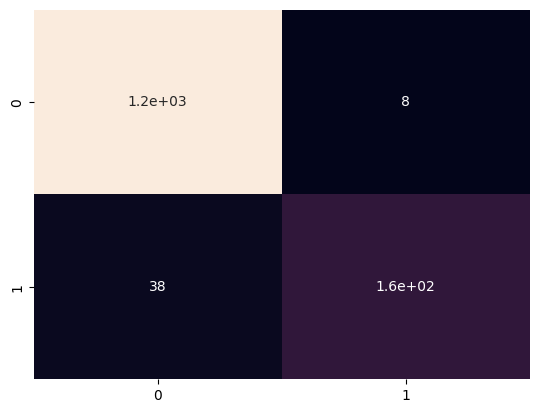

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot = True, cbar = False)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1196
           1       0.95      0.81      0.87       197

    accuracy                           0.97      1393
   macro avg       0.96      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393

